In [3]:

import numpy as np 
import pandas as pd 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Dataset=pd.read_csv('heart.csv')
Dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
Dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


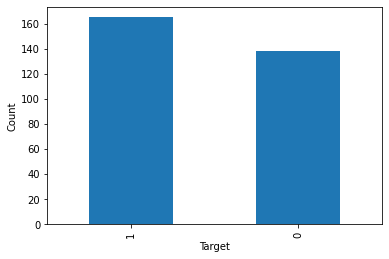

In [7]:
plot=Dataset['target'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [8]:
X=Dataset.drop(['target'], axis=1)
y=Dataset['target']

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
X.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
dtype: bool

In [10]:
#Podijela podataka na skup za treniranje i skup za testiranja
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=0)

X_train.shape

(242, 13)

In [11]:
#Skaliranje
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_valid=pd.DataFrame(sc.transform(X_valid))

X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729


In [12]:

#Skaliranje je uklonilo indekse stupaca, ovako ih vracamo
X_train.columns= X.columns   
X_valid.columns= X.columns

X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.327733,-1.436416,0.985842,-0.574125,-0.632674,-0.418040,0.901639,0.656262,-0.709299,-0.724609,-0.661693,-0.707107,-0.464729
1,1.249032,-1.436416,0.985842,0.831066,0.585437,-0.418040,-0.979367,0.094007,-0.709299,-0.892493,-0.661693,0.265165,-0.464729
2,0.352766,0.696177,0.985842,0.479768,-0.670155,2.392117,-0.979367,0.656262,-0.709299,-0.892493,0.955779,-0.707107,-0.464729
3,0.912932,-1.436416,-0.922749,-0.457026,-0.932517,-0.418040,0.901639,-0.597999,1.409842,-0.892493,-0.661693,-0.707107,-0.464729
4,0.240733,0.696177,0.031547,1.299463,-0.276611,-0.418040,-0.979367,0.613011,-0.709299,-0.892493,0.955779,0.265165,-0.464729


In [13]:
#Funkcija za izgradnju i vizualizaciju matrice komfuzije
from sklearn.metrics import  confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_valid, y_pred)))
    
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

RANDOM FOREST

Random Forest accuracy score: 86.89%


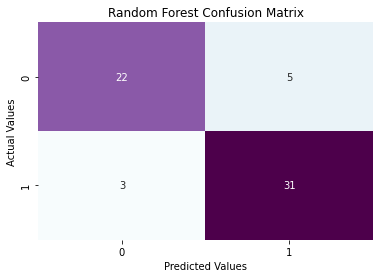

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_valid)
cm_rfc=my_confusion_matrix(y_valid, y_pred_rfc, 'Random Forest Confusion Matrix', 'Random Forest')

Support Vector Classifier

SVC accuracy score: 83.61%


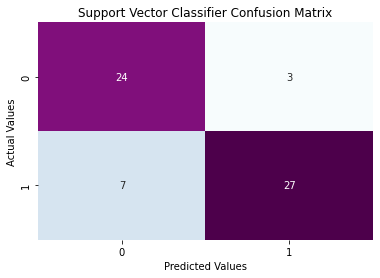

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train, y_train)
y_pred_svc= svc.predict(X_valid)
cm_svc=my_confusion_matrix(y_valid, y_pred_svc, 'Support Vector Classifier Confusion Matrix', 'SVC')

KNN Algorithm (najveca tocnost)

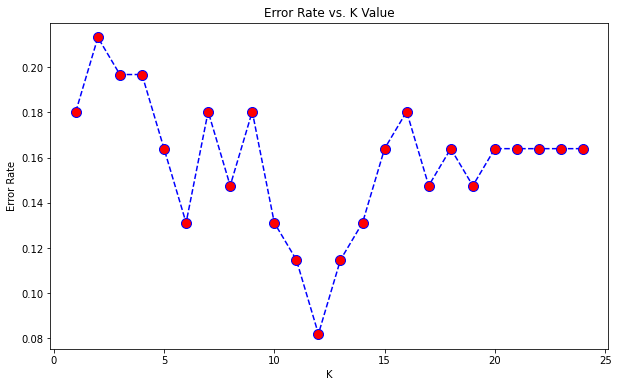

Minimum error:- 0.08196721311475409 at K = 12


In [16]:
from sklearn.neighbors import KNeighborsClassifier
#Vizualizacija 
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=1)
    knn.fit(X_train,y_train)
    pred_i_knn = knn.predict(X_valid)
    error_rate.append(np.mean(pred_i_knn != y_valid))
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

KNN accuracy score: 91.80%


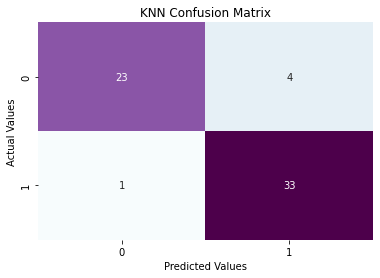

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p=1)
knn_classifier.fit(X_train, y_train)
y_pred_knn=knn_classifier.predict(X_valid)
cm_knn=my_confusion_matrix(y_valid, y_pred_knn, 'KNN Confusion Matrix', 'KNN')